## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Visualizing the data

In [6]:
king = cv2.imread('67.jpg')
king = cv2.cvtColor(king, cv2.COLOR_BGR2RGB)

In [8]:
type(king)

numpy.ndarray

In [9]:
king.shape

(1881, 1354, 3)

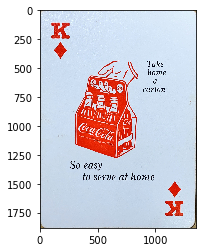

In [10]:
plt.imshow(king)

## Tranforming dataset to make it uniform

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
king.shape

(1881, 1354, 3)

In [22]:
crop_king = king[0:king.shape[0]//3, 0:king.shape[1]//4, :]

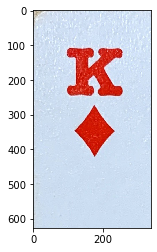

In [23]:
plt.imshow(crop_king)

In [12]:
image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              rescale = 1/255,
                              shear_range = .2,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

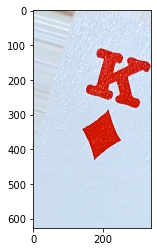

In [24]:
plt.imshow(image_gen.random_transform(crop_king))

In [27]:
image_gen.flow_from_directory('CARDS/train')

Found 312 images belonging to 4 classes.


In [28]:
image_gen.flow_from_directory('CARDS/test')

Found 12 images belonging to 4 classes.


## Preparing Model

In [31]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [33]:
image_shape = (150, 150, 3)

In [35]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 32, kernel_size=(4,4), input_shape = image_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 70, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________

## Training

In [37]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CARDS/train',
                                                target_size = image_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'categorical')

Found 312 images belonging to 4 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory('CARDS/test',
                                                target_size = image_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'categorical')

Found 12 images belonging to 4 classes.


In [39]:
train_image_gen.class_indices

{'CLUBS': 0, 'DIAMONDS': 1, 'HEARTS': 2, 'SPADES': 3}

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
results = model.fit_generator(train_image_gen,
                              epochs=150,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
150/150 [==============================] - 55s 367ms/step - loss: 1.1599 - acc: 0.4046 - val_loss: 0.8215 - val_acc: 0.4931
Epoch 2/150
150/150 [==============================] - 54s 357ms/step - loss: 0.8792 - acc: 0.5187 - val_loss: 0.6765 - val_acc: 0.6111
Epoch 3/150
150/150 [==============================] - 53s 353ms/step - loss: 0.7423 - acc: 0.6075 - val_loss: 0.4554 - val_acc: 0.7847
Epoch 4/150
150/150 [==============================] - 54s 357ms/step - loss: 0.6127 - acc: 0.6942 - val_loss: 0.5488 - val_acc: 0.7847
Epoch 5/150
150/150 [==============================] - 54s 358ms/step - loss: 0.4981 - acc: 0.7688 - val_loss: 0.1786 - val_acc: 0.9306
Epoch 6/150
150/150 [==============================] - 55s 366ms/step - loss: 0.4127 - acc: 0.8208 - val_loss: 0.1836 - val_acc: 0.9444
Epoch 7/150
150/150 [==============================] - 55s 366ms/step - loss: 0.3561 - acc: 0.8575 - val_loss: 0.3078 - val_acc: 0.9444


In [42]:
model.save('suit_recognition.h5')

## Evaluating

In [103]:
train_image_gen.class_indices

{'CLUBS': 0, 'DIAMONDS': 1, 'HEARTS': 2, 'SPADES': 3}

In [43]:
results

In [1]:
#results.history['acc']

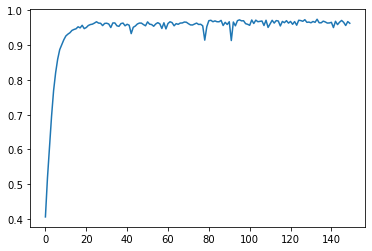

In [46]:
plt.plot(results.history['acc'])

## Prediction on New immage

In [74]:
from keras.preprocessing import image

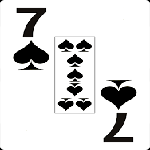

In [94]:
test_img = image.load_img('test_card3.png', target_size = (150, 150))

test_img

In [95]:
type(test_img)

PIL.Image.Image

In [96]:
test_img = image.img_to_array(test_img)
test_img.shape

(150, 150, 3)

In [97]:
test_img = np.expand_dims(test_img, axis = 0)

In [98]:
test_img.shape

(1, 150, 150, 3)

In [99]:
test_img = test_img/255

In [100]:
prediction = model.predict(test_img)

In [101]:
print(prediction)

[[0. 0. 0. 1.]]


In [102]:
prediction

array([[0., 0., 0., 1.]], dtype=float32)